<a href="https://colab.research.google.com/github/Siri2406/OASIS/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
Credit = pd.read_csv('/content/creditcard.csv')
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
Credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156612 entries, 0 to 156611
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    156612 non-null  float64
 1   V1      156612 non-null  float64
 2   V2      156611 non-null  float64
 3   V3      156611 non-null  float64
 4   V4      156611 non-null  float64
 5   V5      156611 non-null  float64
 6   V6      156611 non-null  float64
 7   V7      156611 non-null  float64
 8   V8      156611 non-null  float64
 9   V9      156611 non-null  float64
 10  V10     156611 non-null  float64
 11  V11     156611 non-null  float64
 12  V12     156611 non-null  float64
 13  V13     156611 non-null  float64
 14  V14     156611 non-null  float64
 15  V15     156611 non-null  float64
 16  V16     156611 non-null  float64
 17  V17     156611 non-null  float64
 18  V18     156611 non-null  float64
 19  V19     156611 non-null  float64
 20  V20     156611 non-null  float64
 21  V21     15

In [ ]:
Credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,156612.0,56114.721286,23396.766143,0.000000,39715.750000,57468.500000,74684.000000,108499.000000
V1,156612.0,-0.226386,1.845422,-56.407510,-1.015986,-0.252679,1.167918,2.439207
V2,156611.0,0.048394,1.623688,-72.715728,-0.535158,0.121513,0.808926,22.057729
V3,156611.0,0.593043,1.342725,-33.680984,0.078524,0.696591,1.335921,9.382558
V4,156611.0,0.138981,1.359583,-5.519697,-0.719040,0.153742,0.971445,16.875344
V5,156611.0,-0.226417,1.333430,-42.147898,-0.865289,-0.270190,0.307798,34.801666
V6,156611.0,0.070158,1.291758,-26.160506,-0.675734,-0.187679,0.458524,22.529298
V7,156611.0,-0.102414,1.215751,-43.557242,-0.598388,-0.048747,0.439542,36.677268
V8,156611.0,0.046492,1.247100,-73.216718,-0.147495,0.069685,0.364539,20.007208
V9,156611.0,0.000103,1.153654,-13.434066,-0.674379,-0.099691,0.616347,15.594995


In [ ]:
Credit.shape

(156612, 31)

In [ ]:
round(100 * (Credit.isnull().sum()/len(Credit)), 2).sort_values(ascending=False)

,0
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [ ]:
np.negative(Credit)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.0,1.359807,0.072781,-2.536347,-1.378155,0.338321,-0.462388,-0.239599,-0.098698,-0.363787,...,0.018307,-0.277838,0.110474,-0.066928,-0.128539,0.189115,-0.133558,0.021053,-149.62,-0.0
1,-0.0,-1.191857,-0.266151,-0.166480,-0.448154,-0.060018,0.082361,0.078803,-0.085102,0.255425,...,0.225775,0.638672,-0.101288,0.339846,-0.167170,-0.125895,0.008983,-0.014724,-2.69,-0.0
2,-1.0,1.358354,1.340163,-1.773209,-0.379780,0.503198,-1.800499,-0.791461,-0.247676,1.514654,...,-0.247998,-0.771679,-0.909412,0.689281,0.327642,0.139097,0.055353,0.059752,-378.66,-0.0
3,-1.0,0.966272,0.185226,-1.792993,0.863291,0.010309,-1.247203,-0.237609,-0.377436,1.387024,...,0.108300,-0.005274,0.190321,1.175575,-0.647376,0.221929,-0.062723,-0.061458,-123.50,-0.0
4,-2.0,1.158233,-0.877737,-1.548718,-0.403034,0.407193,-0.095921,-0.592941,0.270533,-0.817739,...,0.009431,-0.798278,0.137458,-0.141267,0.206010,-0.502292,-0.219422,-0.215153,-69.99,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156607,-108494.0,-1.936594,0.120800,-0.229271,-0.757542,1.082415,1.309775,0.519957,0.238844,-2.561387,...,0.210772,0.229685,-0.475874,-0.808513,0.512590,1.019885,-0.033114,0.024264,-2.12,-0.0
156608,-108498.0,0.524261,-0.811210,-2.295550,0.303075,-0.377562,-0.183806,-0.510108,0.157593,-1.150868,...,0.264211,0.314328,0.345303,0.418160,-0.308547,0.730573,0.081765,0.156759,-11.27,-0.0
156609,-108498.0,-1.841738,-0.399834,-0.463993,-4.098001,0.231414,-0.292716,0.544133,0.023382,-0.901591,...,-0.040402,-0.493054,-0.179199,0.015058,0.238452,0.016825,0.007303,0.033115,-18.96,-0.0
156610,-108499.0,2.028823,1.532572,-1.361941,1.968798,-0.880803,-1.106584,-0.241836,-0.560031,-1.693516,...,-0.350387,-0.495138,-0.396035,1.693137,-0.467980,-0.813026,0.152260,-0.047806,-285.00,-0.0


In [ ]:
np.positive(Credit)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156607,108494.0,1.936594,-0.120800,0.229271,0.757542,-1.082415,-1.309775,-0.519957,-0.238844,2.561387,...,-0.210772,-0.229685,0.475874,0.808513,-0.512590,-1.019885,0.033114,-0.024264,2.12,0.0
156608,108498.0,-0.524261,0.811210,2.295550,-0.303075,0.377562,0.183806,0.510108,-0.157593,1.150868,...,-0.264211,-0.314328,-0.345303,-0.418160,0.308547,-0.730573,-0.081765,-0.156759,11.27,0.0
156609,108498.0,1.841738,0.399834,0.463993,4.098001,-0.231414,0.292716,-0.544133,-0.023382,0.901591,...,0.040402,0.493054,0.179199,-0.015058,-0.238452,-0.016825,-0.007303,-0.033115,18.96,0.0
156610,108499.0,-2.028823,-1.532572,1.361941,-1.968798,0.880803,1.106584,0.241836,0.560031,1.693516,...,0.350387,0.495138,0.396035,-1.693137,0.467980,0.813026,-0.152260,0.047806,285.00,0.0


In [ ]:
A = np.negative(Credit).sum()
print(A)

Time     -8.788239e+09
V1        3.545469e+04
V2       -7.578961e+03
V3       -9.287705e+04
V4       -2.176595e+04
V5        3.545933e+04
V6       -1.098748e+04
V7        1.603909e+04
V8       -7.281138e+03
V9       -1.617652e+01
V10       5.887106e+03
V11      -3.449629e+04
V12       1.296796e+04
V13      -9.766308e+03
V14      -1.298869e+04
V15      -2.571205e+04
V16       1.740768e+03
V17      -7.815451e+03
V18       9.709067e+03
V19       3.613136e+03
V20      -5.834549e+03
V21       5.912716e+03
V22       1.686991e+04
V23       4.233849e+03
V24      -1.460782e+03
V25      -1.725139e+04
V26      -3.125411e+03
V27      -2.126361e+02
V28      -3.814262e+02
Amount   -1.381207e+07
Class    -3.500000e+02
dtype: float64


In [ ]:
S = np.negative(Credit)
print("Original array:")
print(S)
print("Replace the negative values of the said array with 0:")
S[S < 0] = 0
print(S)

Original array:
            Time        V1        V2        V3        V4        V5        V6  \
0           -0.0  1.359807  0.072781 -2.536347 -1.378155  0.338321 -0.462388   
1           -0.0 -1.191857 -0.266151 -0.166480 -0.448154 -0.060018  0.082361   
2           -1.0  1.358354  1.340163 -1.773209 -0.379780  0.503198 -1.800499   
3           -1.0  0.966272  0.185226 -1.792993  0.863291  0.010309 -1.247203   
4           -2.0  1.158233 -0.877737 -1.548718 -0.403034  0.407193 -0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
156607 -108494.0 -1.936594  0.120800 -0.229271 -0.757542  1.082415  1.309775   
156608 -108498.0  0.524261 -0.811210 -2.295550  0.303075 -0.377562 -0.183806   
156609 -108498.0 -1.841738 -0.399834 -0.463993 -4.098001  0.231414 -0.292716   
156610 -108499.0  2.028823  1.532572 -1.361941  1.968798 -0.880803 -1.106584   
156611 -108499.0  0.978206       NaN       NaN       NaN       NaN       NaN   

              V7       

In [ ]:
Credit["Class"].unique()

array([ 0.,  1., nan])

In [ ]:
fraud=Credit[Credit["Class"]==1]
Not_fraud=Credit[Credit["Class"]==0]
Not_fraud=Not_fraud.sample(n=492)
New=pd.concat([fraud,Not_fraud],axis=0)
New.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


<Axes: >

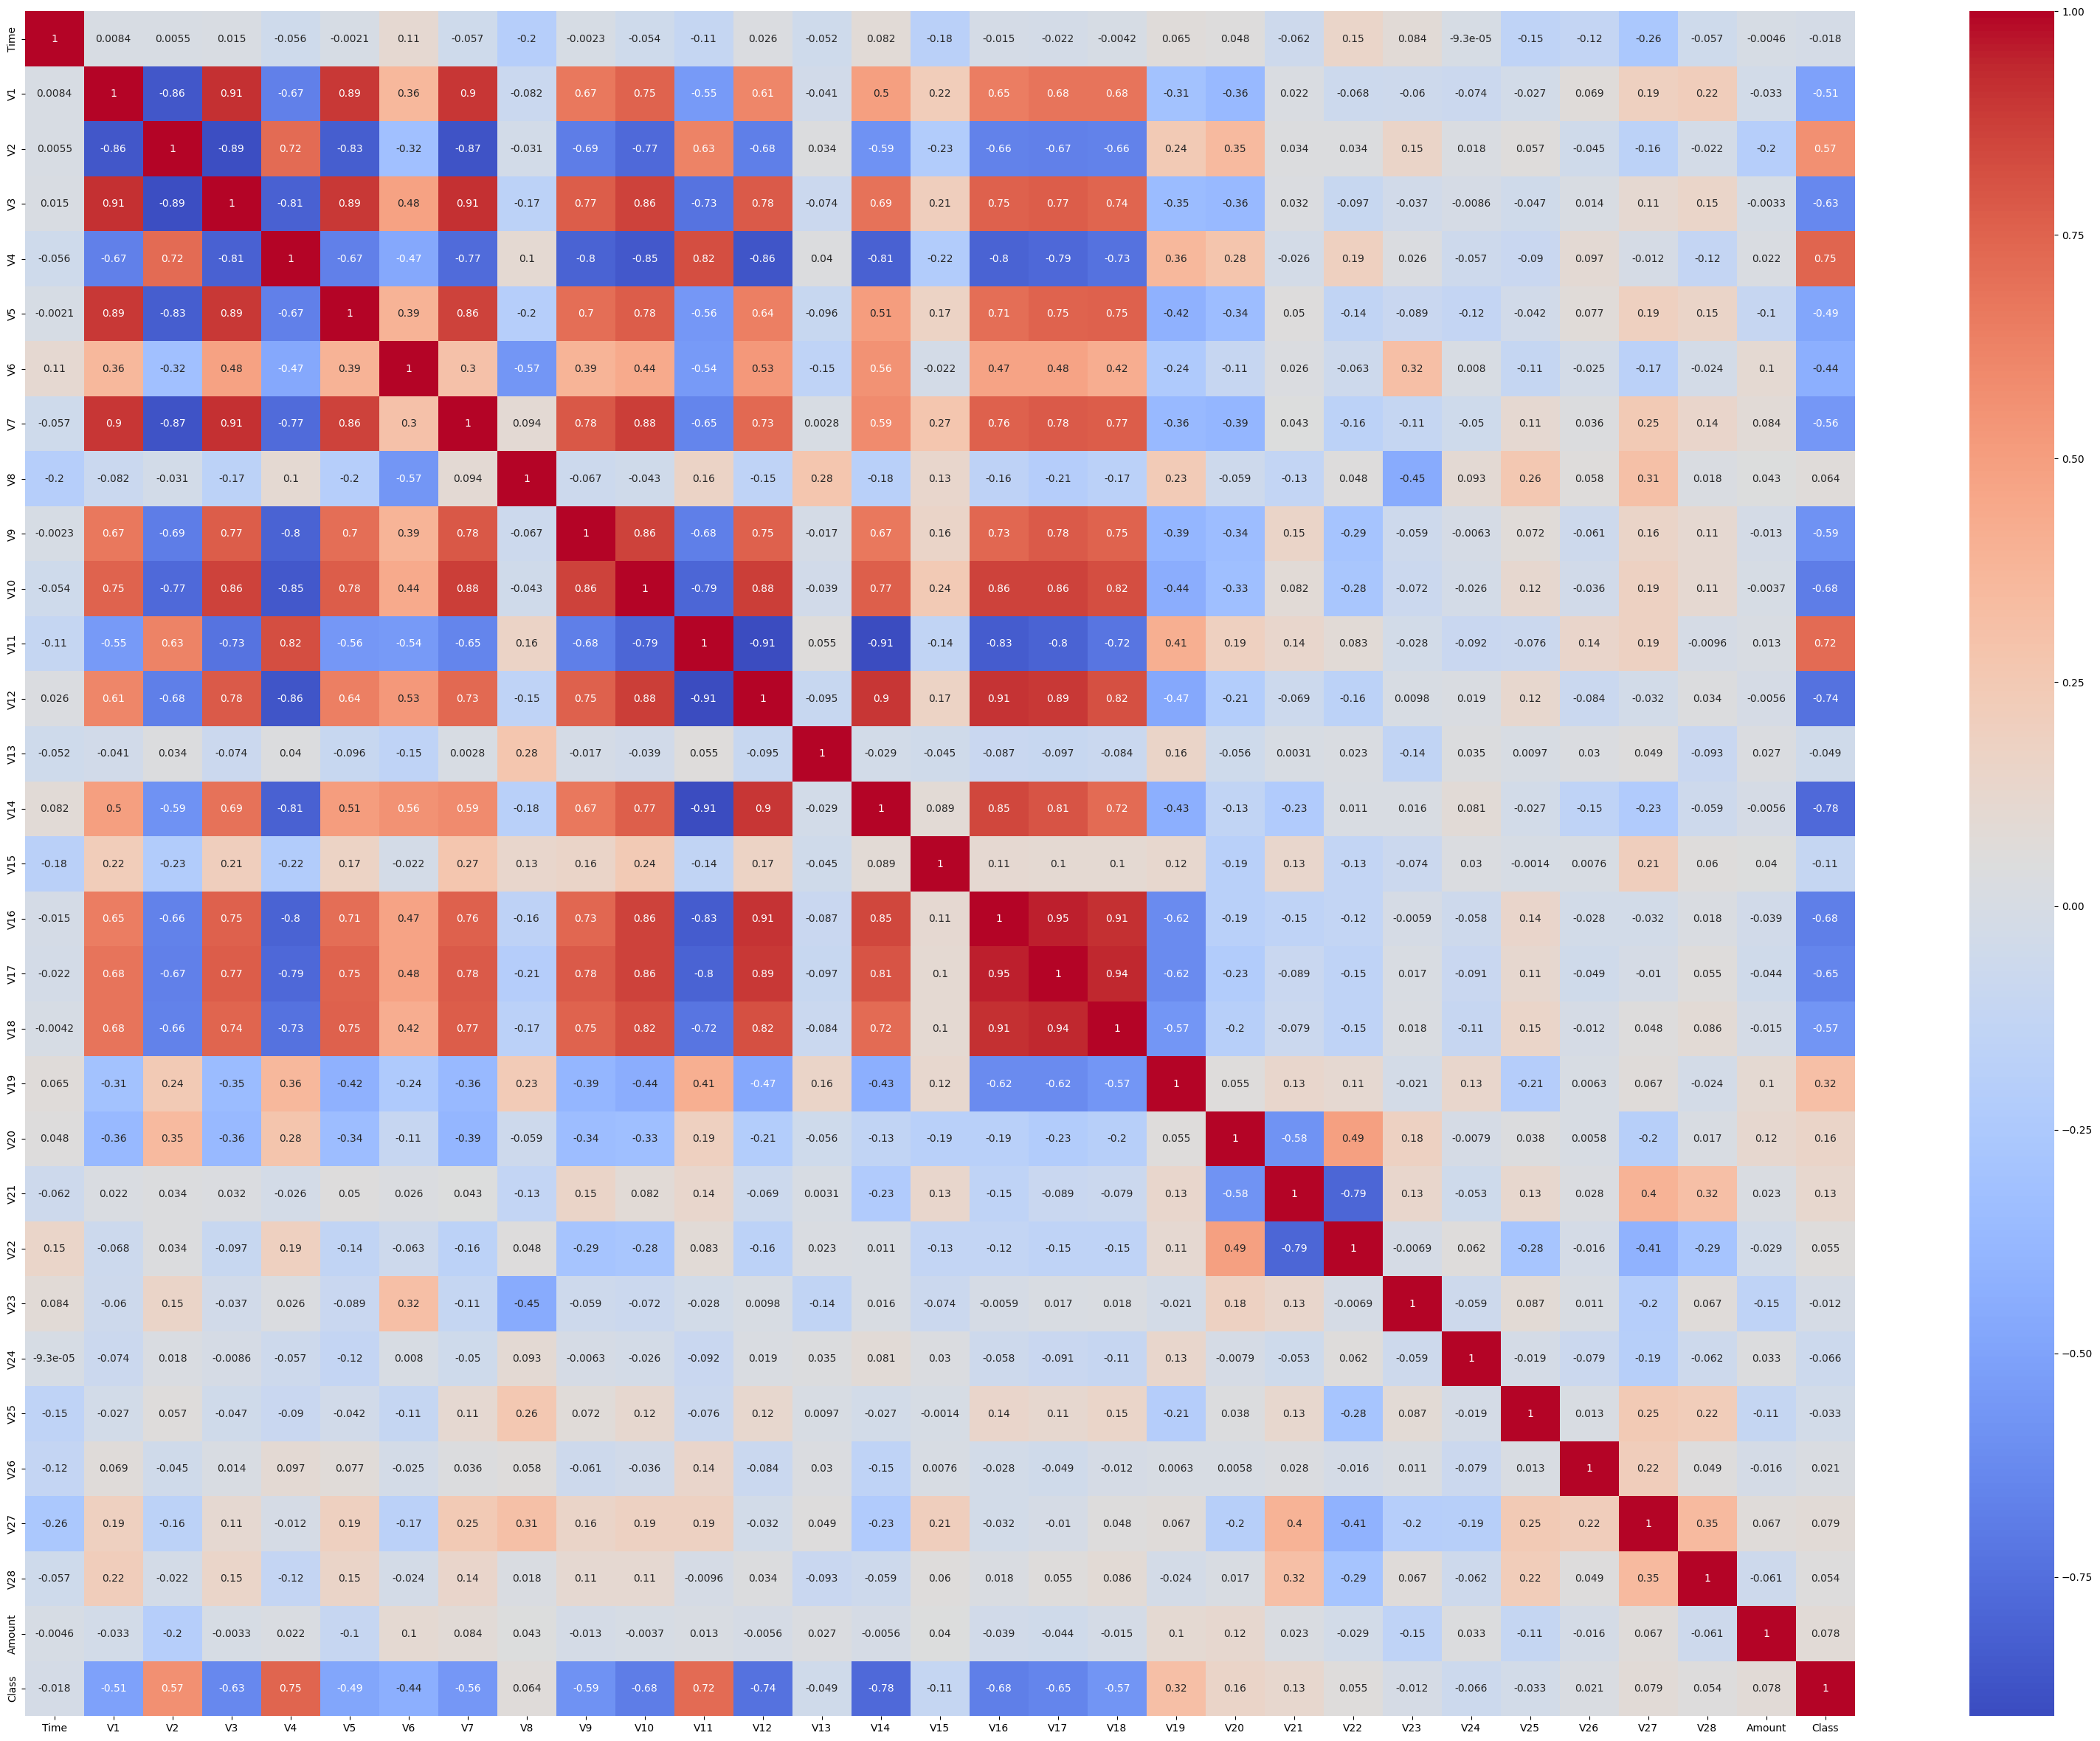

In [ ]:
corr_matrix=New.corr(method="pearson")
plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

In [ ]:
selected_features=New.drop("Class",axis='columns')
selected_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [ ]:
T=New["Class"]
T.head()

,Class
541,1.0
623,1.0
4920,1.0
6108,1.0
6329,1.0


In [ ]:
scaler=StandardScaler()
scaler.fit(selected_features)
selected_features=scaler.transform(selected_features)
A_train,A_test,B_train,B_test=train_test_split(selected_features,T,test_size=0.2,stratify=T,random_state=2)
model=LogisticRegression()
model.fit(A_train,B_train)

LogisticRegression()

In [ ]:
B_predict=model.predict(A_test)
accuracy=accuracy_score(B_test,B_predict)
print("The Accuracy For the LogisticRegression is",int(accuracy*100),"%")

The Accuracy For the LogisticRegression is 92 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ab=DecisionTreeClassifier().fit(A_train,B_train)
A_train_prediction=ab.predict(A_train)
training_data_accuracy=accuracy_score(A_train_prediction,B_train)
print('accuracy for training data is',training_data_accuracy)

accuracy for training data is 1.0


In [ ]:
A_test_prediction=ab.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for test data is 0.893491124260355
